# REGRESIÓN Y REGULARIZACIÓN

Regularization helps to solve over fitting problem in machine learning. Simple model will be a very poor generalization of data. At the same time, complex model may not perform well in test data due to overfitting. We need to choose the right model in between simple and complex model. Regularization helps to choose preferred model complexity, so that model is better at predicting. Regularization is nothing but adding a penalty term to the objective function and control the model complexity using that penalty term. It can be used for many machine learning algorithms.

Why Regularization?

- Over fitting
- Over fitting with linear models
- Regularization of linear models
- Regularized regression in scikit-learn
- Comparing regularized linear models with unregularized linear models.

What is overfitting?

    Building a model that matches the training data “too closely”.
    Learning from the error/distrubance/noise in the data, rather than just the truevalues/signal.

How does over-fitting occur?

    Evaluating a model by testing it on the same data that was used to train it.
    Creating a model that is “too complex”.

What is the impact of over-fitting?

    Model will do well on the training data, but won’t generalize to out-of-sample data i.e., test
    Model will have low bias, but high variance.

What are the general characteristics of linear models?

    Low model complexity
    High bias, low variance
    Generally, Does not tend to over-fit

there is always a chance for over-fitting and it can still occur with linear models if you allow them to have high variance.
Some common causes are:

Cause 1: Irrelevant features

Linear models can over-fit if we include “irrelevant features”, meaning features that are unrelated to the response. Why?

Because it will learn a coefficient for every feature you include in the model, regardless of whether that feature has the impact or the noise.

This is especially a problem when p (number of features) is close to n (number of observations), because that model will naturally have high variance.

Cause 2: Correlated features(Multicollinearity)

Linear models can over-fit if the included features are highly correlated with one another.

Cause 3: Large coefficients

Linear models can over-fit if the coefficients (after feature standardization) are too large. why?

Because the larger the absolute value of the coefficient, the more power it has to change the predicted response, resulting in a higher variance.

Regularization of linear models

    Regularization is a method for “constraining” or “regularizing” the size of the coefficients, thus “shrinking” them towards zero.
    It reduces model variance and thus minimizes overfitting.
    If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.

Our aim is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.

![bias-variance](img/bias-variance.png)

Lasso and Ridge Regularizatios:

A larger lambda results in more regularization:

    Lasso regression shrinks coefficients all the way to zero, thus removing them from the model
    Ridge regression shrinks coefficients toward zero, but they rarely reach zero

How should we choose between Lasso regression and Ridge regression?

    Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
    If model performance is your primary concern, it is best to try both.
    Elastic-Net regression is a combination of lasso regression and ridge Regression.

Should features be normalized or standardized?

    Yes, because otherwise, features would be penalized simply because of their scale.

## 0. Importar librerías.

In [1]:
#Librerías de interés.
import pandas as pd                  #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt      #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns                #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                   #Importamos la librería numpy para manipular arreglos. 

#from google.colab import files       #Esta librería nos sirve para cargar archivos desde el disco duro.

from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.
from sklearn import metrics

from copy import deepcopy                            #Permite hacer copias profundas. 

#!pip install yellowbrick --upgrade                   #Instala y actualiza la librería yellowbrick (la versión por defecto en Google Colab está desactualizada).

from numpy.random import default_rng                 #Generador de números pseudo aleatorios.

%matplotlib inline

## 1. Cargar Datos

In [2]:
df = pd.read_csv('../Datasets/auto-mpg.csv',na_values='?')

## 2. Análisis Exploratorio

### 2.1 Información básica

In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [7]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


### 2.2 Limpieza

In [8]:
df_clean = deepcopy(df)

In [9]:
df_clean.shape

(398, 9)

In [10]:
df_clean = df_clean.dropna()
df_clean.shape

(392, 9)

### 2.3 Correlaciones

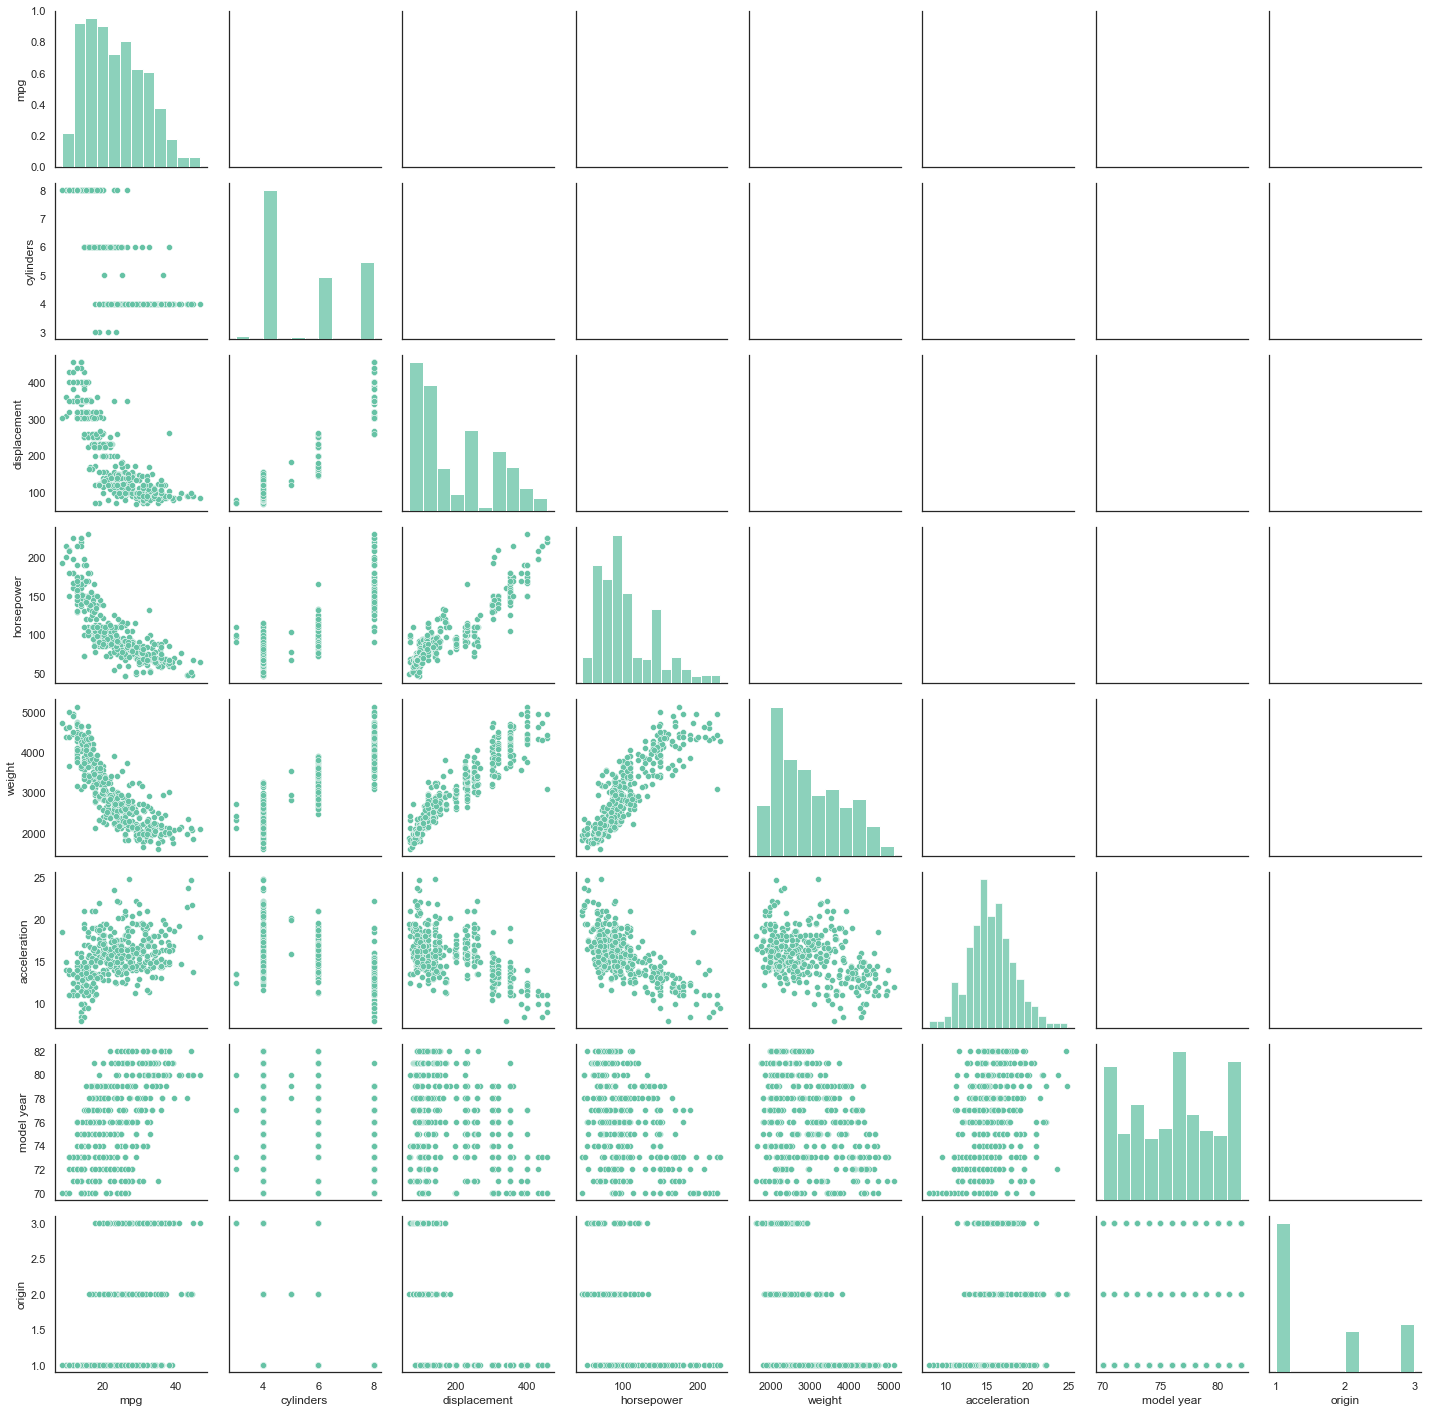

In [11]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_clean,diag_sharey=False, corner=False)

g.map_diag(sns.histplot) #Muestra el histograma en la diagonal principal.
g.map_lower(sns.scatterplot) #Muestra gráficos de dispersión en la sección inferior izquierda de la matriz.

g.add_legend()

plt.show()

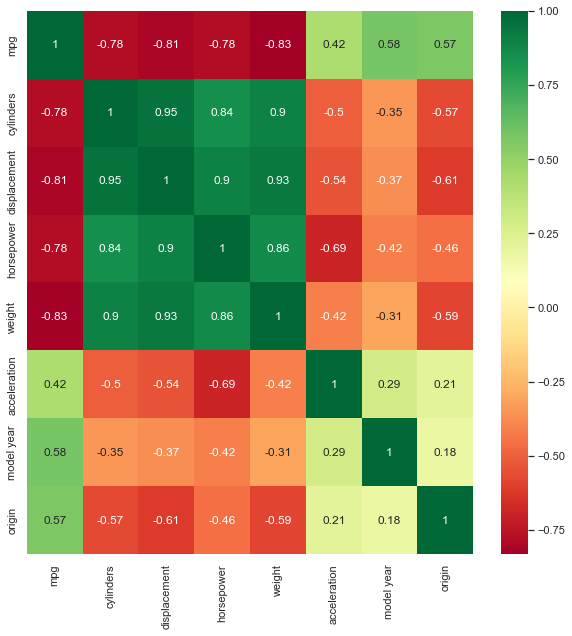

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clean.corr(), annot=True,cmap='RdYlGn')
plt.show()

## 3. Modelo

### 3.1 Creación del Modelo

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

### 3.2 Selección de predictores

In [14]:
# 1   cylinders     398 non-null    int64  
# 2   displacement  398 non-null    float64
# 3   horsepower    398 non-null    object 
# 4   weight        398 non-null    int64  
# 5   acceleration  398 non-null    float64
# 6   model year    398 non-null    int64  
# 7   origin        398 non-null    int64  

In [18]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='mpg'

df_y = df_clean[nombre_de_la_variable_de_salida]
print('Dataframe de salida:')
print(df_y.shape)

nombre_de_las_variables_de_entrada = ['cylinders','displacement','horsepower','weight','acceleration','model year','origin']

df_x = df_clean[nombre_de_las_variables_de_entrada]
print('\nDataframe de entrada:')
print(type(df_x))
print(df_x.shape)

Dataframe de salida:
(392,)

Dataframe de entrada:
<class 'pandas.core.frame.DataFrame'>
(392, 7)


### 3.3 Preaparación y Particionamiento de los datos

In [19]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo o validación, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42
4#Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_desarrollo    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_desarrollo = particion_para_entrenamiento+particion_para_desarrollo #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_desarrollo #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
df_x_rest, df_x_test, df_y_rest, df_y_test = train_test_split(df_x,                                         #100% de los datos de entrada. 
                                                              df_y,                                         #100% de los datos de salida. 
                                                              test_size=particion_para_pruebas, 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
df_x_train, df_x_val, df_y_train, df_y_val = train_test_split(df_x_rest,                                    #Una fracción de los datos de entrada. 
                                                              df_y_rest,                                    #Una fracción de los datos de salida.        
                                                              test_size=particion_para_desarrollo/particion_para_entrenamiento_y_desarrollo, #cuidado! este es el porcentaje respecto al "resto". 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_entrenamiento*100))
print('-----------------------------------------------------------------------')
print(df_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de desarrollo {:1.0f}%'.format(particion_para_desarrollo*100))
print('-----------------------------------------------------------------------')
print(df_x_val.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_pruebas*100))
print('-----------------------------------------------------------------------')
print(df_x_test.info(),'\n',sep='')

-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 60%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 260 to 238
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     234 non-null    int64  
 1   displacement  234 non-null    float64
 2   horsepower    234 non-null    float64
 3   weight        234 non-null    int64  
 4   acceleration  234 non-null    float64
 5   model year    234 non-null    int64  
 6   origin        234 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.6 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de desarrollo 20%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 209 to 103
Data columns 

### Normalización o Estandiazación (opcional)

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale=MinMaxScaler()
df_x_train=scale.fit_transform(df_x_train)
df_x_val=scale.transform(df_x_val)
df_x_test=scale.transform(df_x_test)

### 3.4 Entrenamiento

In [20]:
lin_reg_model.fit(df_x_train,df_y_train)
print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1]=', lin_reg_model.coef_)

intercept [w0]= -23.963596430732448
slope [w1]= [-0.32806042  0.01513136 -0.01003344 -0.00618563  0.13483205  0.80066055
  1.75719735]


## 4. Evaluación

In [21]:
def test_lr_model (df_x,df_y,y_pred):
    
    #r_sq = lin_reg_model.score(df_x, df_y)
    #print('Coefficient R^2: %.4f' % r_sq)
    mse = metrics.mean_squared_error(df_y, y_pred)
    rmse = np.sqrt(mse)
    print('MSE: %.4f'% mse)
    print('RMSE: %.4f' % rmse)

    e = df_y - y_pred

    plt.scatter(y_pred,e)
    a = np.zeros(len(e))
    a = a.reshape(-1,1)
    plt.scatter(y_pred,a)
    plt.title('Training Data: Residuals vs Predicted values')
    plt.ylabel('Residuals')
    plt.xlabel('Predicted')
    plt.show()


### 4.1 Evaluar el modelo en el conjunto de entrenamiento

MSE: 11.7744
RMSE: 3.4314


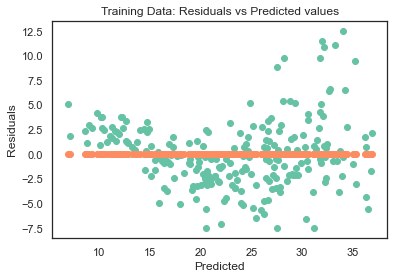

In [22]:
y_pred_train = lin_reg_model.predict(df_x_train)
test_lr_model(df_x_train,df_y_train,y_pred_train)

### 4.2 Evaluar el modelo en el conjunto de validación

MSE: 8.9277
RMSE: 2.9879


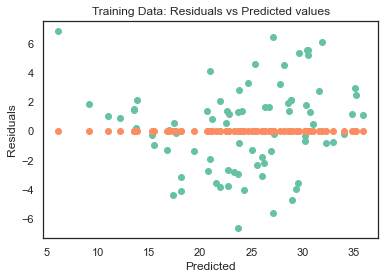

In [23]:
y_pred_val = lin_reg_model.predict(df_x_val)
test_lr_model(df_x_val,df_y_val,y_pred_val)

# OTRO Modelo y Evaluación

In [45]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale=MinMaxScaler()
df_x_train=scale.fit_transform(df_x_train)
df_x_val=scale.transform(df_x_val)
df_x_test=scale.transform(df_x_test)

### Ridge

In [36]:
from sklearn.linear_model import Ridge, Lasso

alpha = 100
ridge_1 = Ridge(alpha = alpha)

In [37]:
 ridge_1.fit(df_x_train, df_y_train)

Ridge(alpha=100)

In [ ]:
# 1   cylinders     398 non-null    int64  
# 2   displacement  398 non-null    float64
# 3   horsepower    398 non-null    object 
# 4   weight        398 non-null    int64  
# 5   acceleration  398 non-null    float64
# 6   model year    398 non-null    int64  
# 7   origin        398 non-null    int64  

In [38]:
print('intercept [w0]=', ridge_1.intercept_)
print('slope [wn]=', ridge_1.coef_)

intercept [w0]= -18.835458034483995
slope [wn]= [-0.10838628  0.00562223 -0.00353343 -0.00638382  0.12009454  0.7635344
  0.80323266]


In [39]:
print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [wn]=', lin_reg_model.coef_)

intercept [w0]= -23.963596430732448
slope [wn]= [-0.32806042  0.01513136 -0.01003344 -0.00618563  0.13483205  0.80066055
  1.75719735]


MSE: 12.1250
RMSE: 3.4821


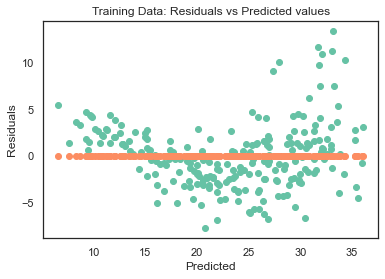

In [40]:
y_pred_train = ridge_1.predict(df_x_train)
test_lr_model(df_x_train,df_y_train,y_pred_train)

MSE: 8.6985
RMSE: 2.9493


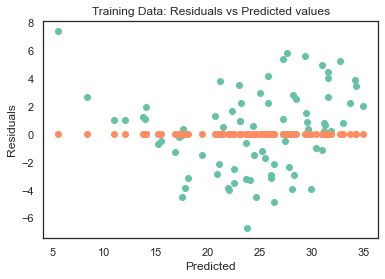

In [41]:
y_pred_val = ridge_1.predict(df_x_val)
test_lr_model(df_x_val,df_y_val,y_pred_val)

### Lasso

In [85]:
alpha = 0.1

lasso_1 = Lasso(alpha = alpha)

In [86]:
lasso_1.fit(df_x_train, df_y_train)

Lasso(alpha=0.1)

In [87]:
# 1   cylinders     398 non-null    int64  
# 2   displacement  398 non-null    float64
# 3   horsepower    398 non-null    object 
# 4   weight        398 non-null    int64  
# 5   acceleration  398 non-null    float64
# 6   model year    398 non-null    int64  
# 7   origin        398 non-null    int64  

In [88]:
print('intercept [w0]=', lasso_1.intercept_)
print('slope [wn]=', lasso_1.coef_)

intercept [w0]= -22.635619069145317
slope [wn]= [-0.          0.00765872 -0.00946258 -0.00617194  0.10163921  0.79023321
  1.4673904 ]


In [89]:
print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [wn]=', lin_reg_model.coef_)

intercept [w0]= -23.963596430732448
slope [wn]= [-0.32806042  0.01513136 -0.01003344 -0.00618563  0.13483205  0.80066055
  1.75719735]


MSE: 11.8349
RMSE: 3.4402


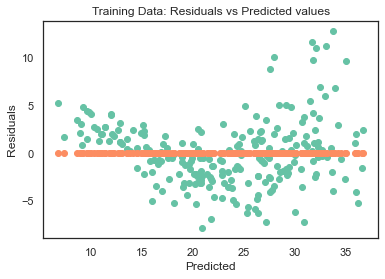

In [90]:
y_pred_train = lasso_1.predict(df_x_train)
test_lr_model(df_x_train,df_y_train,y_pred_train)

MSE: 8.7641
RMSE: 2.9604


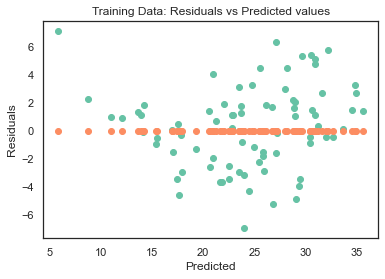

In [91]:
y_pred_val = lasso_1.predict(df_x_val)
test_lr_model(df_x_val,df_y_val,y_pred_val)

### ElasticNet

In [58]:
from sklearn.linear_model import ElasticNet

alpha = 0.01
l1_ratio = 0.5
elastic_1 = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

In [59]:
elastic_1.fit(df_x_train, df_y_train)

ElasticNet(alpha=0.01)

In [60]:
print('intercept [w0]=', elastic_1.intercept_)
print('slope [wn]=', elastic_1.coef_)

intercept [w0]= 25.34113993582227
slope [wn]= [ -1.8348961   -1.05394772  -4.01160508 -11.7977726    0.
   8.74106401   3.50065765]


MSE: 12.2465
RMSE: 3.4995


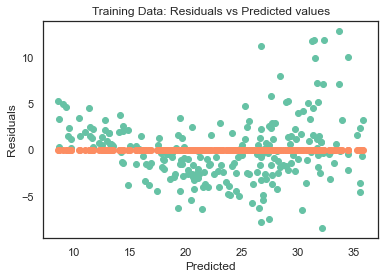

In [61]:
y_pred_train = elastic_1.predict(df_x_train)
test_lr_model(df_x_train,df_y_train,y_pred_train)

MSE: 9.7667
RMSE: 3.1252


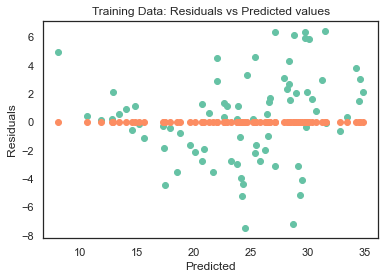

In [62]:
y_pred_val = elastic_1.predict(df_x_val)
test_lr_model(df_x_val,df_y_val,y_pred_val)

### ¿Cómo encontrar los hiperparámetros óptimos para un modelo?

In [61]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

alphas = np.arange(0.001, 10, 0.01)

tuned_parameters = [{"alpha": alphas}]
n_folds = 10

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring = 'neg_root_mean_squared_error',refit=True)
clf.fit(df_x_train, df_y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

(0.001, 9.990999999999998)

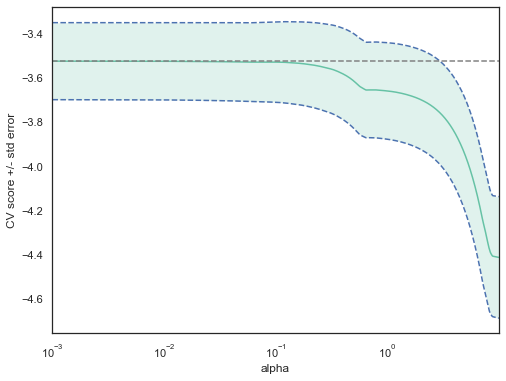

In [62]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [63]:
clf.best_params_

{'alpha': 0.001}

In [64]:
alpha = 0.001

lasso_2 = Lasso(alpha = alpha)
lasso_2.fit(df_x_train, df_y_train)
print('intercept [w0]=', lasso_2.intercept_)
print('slope [wn]=', lasso_2.coef_)

intercept [w0]= -23.95221779835236
slope [wn]= [-0.32400986  0.01504468 -0.01002579 -0.00618561  0.13449731  0.80055917
  1.75427334]


MSE: 8.9256
RMSE: 2.9876


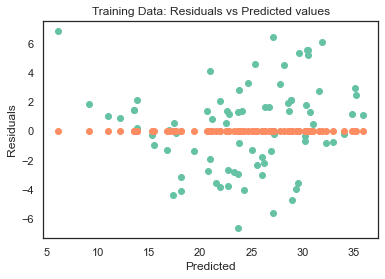

In [65]:
y_pred_val = lasso_2.predict(df_x_val)
test_lr_model(df_x_val,df_y_val,y_pred_val)

MSE: 10.6202
RMSE: 3.2589


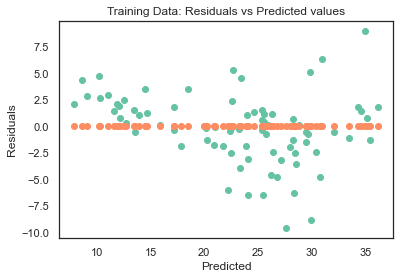

In [66]:
y_pred_test = lasso_2.predict(df_x_test)
test_lr_model(df_x_test,df_y_test,y_pred_test)

In [ ]:
intercept [w0]= 25.332431067269102
slope [wn]= [ -0.51287389  -0.          -1.2525131  -16.81253507   0.
   9.21896122   3.14236111]

In [ ]:
# 1   cylinders     398 non-null    int64  
# 2   displacement  398 non-null    float64 no
# 3   horsepower    398 non-null    object  
# 4   weight        398 non-null    int64  
# 5   acceleration  398 non-null    float64 no
# 6   model year    398 non-null    int64  
# 7   origin        398 non-null    int64  

In [83]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='mpg'

df_y = df_clean[nombre_de_la_variable_de_salida]
print('Dataframe de salida:')
print(df_y.shape)

nombre_de_las_variables_de_entrada = ['cylinders','horsepower','weight','model year','origin']

df_x = df_clean[nombre_de_las_variables_de_entrada]
print('\nDataframe de entrada:')
print(type(df_x))
print(df_x.shape)

Dataframe de salida:
(392,)

Dataframe de entrada:
<class 'pandas.core.frame.DataFrame'>
(392, 5)


In [84]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo o validación, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42
4#Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_desarrollo    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_desarrollo = particion_para_entrenamiento+particion_para_desarrollo #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_desarrollo #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
df_x_rest, df_x_test, df_y_rest, df_y_test = train_test_split(df_x,                                         #100% de los datos de entrada. 
                                                              df_y,                                         #100% de los datos de salida. 
                                                              test_size=particion_para_pruebas, 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
df_x_train, df_x_val, df_y_train, df_y_val = train_test_split(df_x_rest,                                    #Una fracción de los datos de entrada. 
                                                              df_y_rest,                                    #Una fracción de los datos de salida.        
                                                              test_size=particion_para_desarrollo/particion_para_entrenamiento_y_desarrollo, #cuidado! este es el porcentaje respecto al "resto". 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_entrenamiento*100))
print('-----------------------------------------------------------------------')
print(df_y_train.shape)
print(df_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de desarrollo {:1.0f}%'.format(particion_para_desarrollo*100))
print('-----------------------------------------------------------------------')
print(df_x_val.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_pruebas*100))
print('-----------------------------------------------------------------------')
print(df_x_test.info(),'\n',sep='')

-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 60%
-----------------------------------------------------------------------
(234,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 260 to 238
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cylinders   234 non-null    int64  
 1   horsepower  234 non-null    float64
 2   weight      234 non-null    int64  
 3   model year  234 non-null    int64  
 4   origin      234 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.0 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de desarrollo 20%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 209 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  

In [112]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale=MinMaxScaler()
df_x_train=scale.fit_transform(df_x_train)
df_x_val=scale.transform(df_x_val)
df_x_test=scale.transform(df_x_test)

In [121]:
lin_reg_2 = Ridge(alpha=0.1)

lin_reg_2.fit(df_x_train,df_y_train)
print('intercept [w0]=', lin_reg_2.intercept_)
print('slope [w1]=', lin_reg_2.coef_)

intercept [w0]= 25.382856632026478
slope [w1]= [  0.05672381  -2.97059465 -16.6428762    9.4170022    3.32611652]


MSE: 11.9193
RMSE: 3.4524


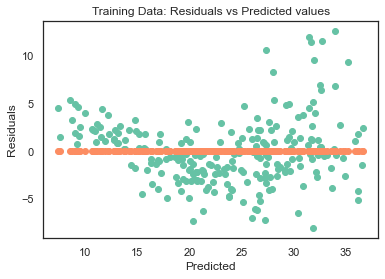

In [122]:
y_pred_train = lin_reg_2.predict(df_x_train)
test_lr_model(df_x_train,df_y_train,y_pred_train)

MSE: 8.9650
RMSE: 2.9942


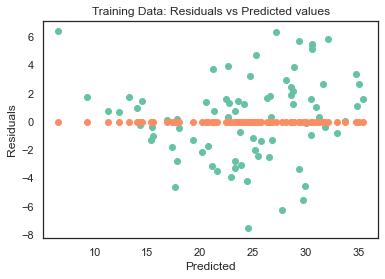

In [123]:
y_pred_val = lin_reg_2.predict(df_x_val)
test_lr_model(df_x_val,df_y_val,y_pred_val)

MSE: 11.2525
RMSE: 3.3545


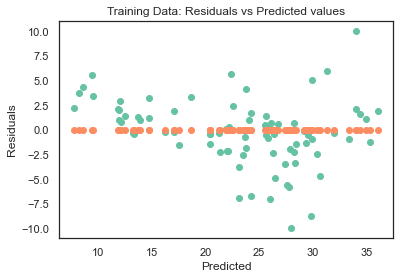

In [124]:
y_pred_test = lin_reg_2.predict(df_x_test)
test_lr_model(df_x_test,df_y_test,y_pred_test)